<a href="https://colab.research.google.com/github/RassimCHEBLI/RassimCHEBLI/blob/circleci-project-setup/politique_debat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
os.chdir('/content/drive/MyDrive/datascience_nlp')

In [ ]:
!pip install scattertext
!pip install spacy
!pip install nltk
!pip install termcolor

     |████████████████████████████████| 7.3 MB 10.2 MB/s 
     |████████████████████████████████| 24.1 MB 90.1 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=85ee1000809bcfafa0549cff10ebb927fafc6f8de7df74c21365555585f4ad89
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!python -m spacy download fr_core_news_md

     |████████████████████████████████| 88.6 MB 1.3 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.2.5-py3-none-any.whl size=90338488 sha256=8a3d26e84fc4461b68fe536dd0d464d0f3056a6efc4c1e90bd27788dbf2a39e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-zkmex7in/wheels/2e/26/ff/ce93eb966e7176ebe81e6c98209582e13e108cdd2d6d636df0
Successfully built fr-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

# Modules de traitement du texte
import spacy
import fr_core_news_md
import nltk
import re
from termcolor import colored

# Modules pour le wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Module pour scattertext
import scattertext as st

# Modules de modélisation
from sklearn.utils.fixes import loguniform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [ ]:
os.chdir('/content/drive/MyDrive/datascience_nlp')

In [ ]:
ls


comments_1.csv  tweets_politics_2022.csv


In [ ]:
df_tweet=pd.read_csv('tweets_politics_2022.csv')


In [ ]:
df_tweet.head(10)

,id,created_at,favorite_count,retweet_count,text,user_id
0,1487771447992926210,2022-01-30 12:55:29,436.0,193.0,Redonner du sens à la gauche : se rassembler a...,JeanLuc_Melenchon
1,1487400906517848070,2022-01-29 12:23:05,2350.0,1027.0,L’inscription sur les listes électorales c’est...,JeanLuc_Melenchon
2,1487117751084855300,2022-01-28 17:37:55,1145.0,480.0,🔴 Rendez-vous ce dimanche 30 janvier à 20h55 s...,JeanLuc_Melenchon
3,1487104482336989191,2022-01-28 16:45:12,1164.0,437.0,3 solutions pour financer la retraite à 60 ans...,JeanLuc_Melenchon
4,1487080530558476288,2022-01-28 15:10:01,1591.0,551.0,La Méditerranée est le plus grand cimetière du...,JeanLuc_Melenchon
5,1487033635995889664,2022-01-28 12:03:41,1335.0,487.0,Retour d'émission #FaceABaba - Nouvelle note d...,JeanLuc_Melenchon
6,1486861570307239936,2022-01-28 00:39:57,938.0,220.0,"Le jour de mes 50 ans, la fille de Raquel et d...",JeanLuc_Melenchon
7,1486855621739700226,2022-01-28 00:16:19,654.0,215.0,La majeure partie de la dette publique de la z...,JeanLuc_Melenchon
8,1486855070016749568,2022-01-28 00:14:07,715.0,219.0,"Dans une entreprise, je propose qu'il n'y ait ...",JeanLuc_Melenchon
9,1486854745939718146,2022-01-28 00:12:50,695.0,233.0,Le peuple français est mal en ce moment. Il a ...,JeanLuc_Melenchon


In [ ]:
df_tweet.shape

(18430, 6)

In [ ]:
df_tweet.head()

,id,created_at,favorite_count,retweet_count,text,user_id
0,1487771447992926210,2022-01-30 12:55:29,436.0,193.0,Redonner du sens à la gauche : se rassembler a...,JeanLuc_Melenchon
1,1487400906517848070,2022-01-29 12:23:05,2350.0,1027.0,L’inscription sur les listes électorales c’est...,JeanLuc_Melenchon
2,1487117751084855300,2022-01-28 17:37:55,1145.0,480.0,🔴 Rendez-vous ce dimanche 30 janvier à 20h55 s...,JeanLuc_Melenchon
3,1487104482336989191,2022-01-28 16:45:12,1164.0,437.0,3 solutions pour financer la retraite à 60 ans...,JeanLuc_Melenchon
4,1487080530558476288,2022-01-28 15:10:01,1591.0,551.0,La Méditerranée est le plus grand cimetière du...,JeanLuc_Melenchon


In [ ]:
# Implémentez la fonction en changeant le None
def check_missing_values(df_tweet):
  print("check for missing value :")
     

check_missing_values(df_tweet)

check for missing value :


In [ ]:
# Combien de tweets dans la base de données pour chacun des candidats ? 
df_tweet["created_at"]= pd.to_datetime(df_tweet["created_at"])
df_tweet.groupby("user_id").created_at.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:677: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


,count,unique,top,freq,first,last
user_id,,,,,,
Anne_Hidalgo,838,825,2021-12-24 18:08:50,3,2021-07-12 15:29:23,2022-01-30 10:58:47
Christianne_Taubira,2402,2394,2021-11-18 19:35:29,3,2011-08-26 04:30:30,2022-01-30 14:00:01
Emmanuel_Macron,2969,2751,2019-12-03 13:49:09,4,2018-11-29 12:22:40,2022-01-29 19:49:37
Eric_Zemmour,2752,2707,2021-09-23 22:39:59,3,2020-12-18 22:18:49,2022-01-29 21:58:31
JeanLuc_Melenchon,2756,2752,2022-01-21 19:23:57,2,2021-09-13 08:57:51,2022-01-30 12:55:29
Marine_Lepen,2782,2770,2021-12-27 19:08:11,3,2020-02-10 21:38:13,2022-01-30 12:17:02
Valerie_Pecresse,2399,2399,2022-01-29 17:54:29,1,2018-06-20 09:40:14,2022-01-29 17:54:29
Yannick_Jadot,1532,1515,2021-10-25 11:10:54,3,2021-02-14 11:24:25,2022-01-29 21:51:04


In [ ]:
 #A quelles dates ont été envoyés les premiers / derniers tweets des candidats ? 
#TODO

In [ ]:
# Quelle est la distribution des favoris et retweets des candidats  ?
df_tweet.groupby("user_id").retweet_count.describe()


,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
Anne_Hidalgo,838.0,98.097852,177.219356,1.0,34.00,68.0,113.00,2900.0
Christianne_Taubira,2402.0,137.960866,553.241746,0.0,24.00,46.5,102.75,15718.0
Emmanuel_Macron,2969.0,1088.372853,2743.806652,20.0,305.00,514.0,950.00,64283.0
Eric_Zemmour,2752.0,844.556686,783.894937,13.0,368.00,613.0,1040.00,8698.0
JeanLuc_Melenchon,2756.0,194.824746,276.502632,20.0,63.00,106.0,216.00,5719.0
Marine_Lepen,2782.0,432.787563,364.430943,24.0,202.25,311.0,531.00,4097.0
Valerie_Pecresse,2399.0,98.312213,142.986371,0.0,35.00,65.0,112.00,3611.0
Yannick_Jadot,1532.0,60.967363,72.798983,0.0,13.00,40.0,86.00,1090.0


##### Répartition du nombre de retweets / favoris dans le temps 


In [ ]:
def visualize_count_favorites(df, userID) : 
  
  ''' Cette fonction permet de visualiser le nombre de favoris et de retweets 
  sur toute la période pour un user_id donné '''

  df_temp = df.loc[df["user_id"] == userID]
  ylabels = ["favorite_count", "retweet_count"]

  print("Représentation des nombres de retweets et de favoris de chaque tweet de {} par date".format(userID))
  fig = plt.figure(figsize=(13,3))
  fig.subplots_adjust(hspace=0.01,wspace=0.01)

  n_row = len(ylabels)
  n_col = 1
  for count, ylabel in enumerate(ylabels):
      ax = fig.add_subplot(n_row, n_col, count + 1)
      ax.plot(df_temp["created_at"], df_temp[ylabel])
      ax.set_ylabel(ylabel)
  
  plt.show()

Représentation des nombres de retweets et de favoris de chaque tweet de JeanLuc_Melenchon par date


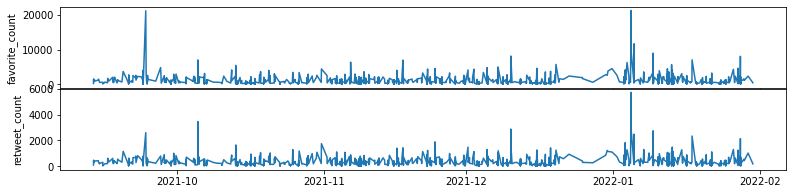



Représentation des nombres de retweets et de favoris de chaque tweet de Marine_Lepen par date


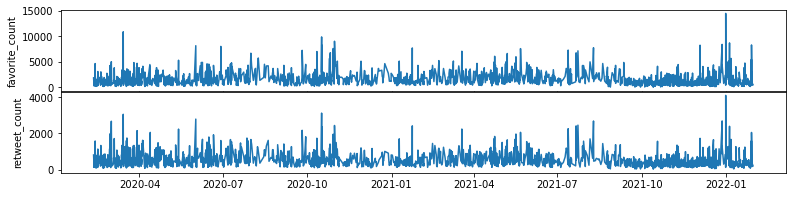

In [ ]:
visualize_count_favorites(df_tweet, "JeanLuc_Melenchon")
print("\n")
visualize_count_favorites(df_tweet, "Marine_Lepen")

> **Question** : Qu'observe-t'on ? 
Est-ce que des candidats font des tweets + ou - longs que d'autres ? 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
<ul>
    <li> Utilisez la fonction <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html" >.split()</a> pour calculer la taille des tweets</li>
    <li> Vous pouvez utiliser la fonction groupby et describe() </li>

</ul>
</p>


In [ ]:
# Calcul d'une variable contenant le nombre de mots de chaque tweets

df_tweet["length_tweet"]= df_tweet["text"].apply(lambda txt : len(txt.split()))
df_tweet

,id,created_at,favorite_count,retweet_count,text,user_id,length_tweet
0,1487771447992926210,2022-01-30 12:55:29,436.0,193.0,Redonner du sens à la gauche : se rassembler a...,JeanLuc_Melenchon,22
1,1487400906517848070,2022-01-29 12:23:05,2350.0,1027.0,L’inscription sur les listes électorales c’est...,JeanLuc_Melenchon,52
2,1487117751084855300,2022-01-28 17:37:55,1145.0,480.0,🔴 Rendez-vous ce dimanche 30 janvier à 20h55 s...,JeanLuc_Melenchon,14
3,1487104482336989191,2022-01-28 16:45:12,1164.0,437.0,3 solutions pour financer la retraite à 60 ans...,JeanLuc_Melenchon,43
4,1487080530558476288,2022-01-28 15:10:01,1591.0,551.0,La Méditerranée est le plus grand cimetière du...,JeanLuc_Melenchon,46
...,...,...,...,...,...,...,...
18425,1344391795250253824,2020-12-30 21:15:56,2860.0,420.0,Rendez vous lundi 4 janvier sur @Cnews ! 📺,Eric_Zemmour,9
18426,1342185383212290050,2020-12-24 19:08:26,13553.0,1967.0,Joyeux Noël à tous ! 🎄\n\nEZ https://t.co/TBA7...,Eric_Zemmour,8
18427,1342135444209807364,2020-12-24 15:50:00,716.0,122.0,https://t.co/94u5dE3VH2,Eric_Zemmour,1
18428,1340694449173614592,2020-12-20 16:24:00,2686.0,525.0,Eric #Zemmour sur @CNEWS : « Il y a une fascin...,Eric_Zemmour,38


In [ ]:

# Calcul de la distribution de la variable pour chaque politique
#on fait le describe pour regarder lecards type aussi et le median 
df_tweet.groupby("user_id").length_tweet.describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
Anne_Hidalgo,838.0,31.445107,13.764054,2.0,20.0,36.0,43.0,54.0
Christianne_Taubira,2402.0,19.308493,7.433403,1.0,15.0,19.0,22.0,52.0
Emmanuel_Macron,2969.0,29.939374,13.032758,1.0,20.0,32.0,41.0,57.0
Eric_Zemmour,2752.0,25.817951,12.788038,1.0,16.0,26.0,36.0,55.0
JeanLuc_Melenchon,2756.0,33.462264,10.601255,3.0,26.0,35.0,42.0,57.0
Marine_Lepen,2782.0,35.859094,10.283902,1.0,31.0,39.0,43.0,56.0
Valerie_Pecresse,2399.0,35.304710,10.299847,1.0,30.0,38.0,43.0,58.0
Yannick_Jadot,1532.0,30.542428,11.402907,1.0,23.0,33.0,39.0,55.0


##### Lecture de quelques tweets

In [ ]:
def print_famous_tweet(userID, nb_favorites) :

  ''' Cette fonction permet de sélectionner les tweets qui ont eu le plus de favoris 
  pour un user_id donné, et de lire le tweet avec les indicateurs des autres variables de la 
  base de données  
  '''

  df_sub = df_tweet.loc[(df_tweet.user_id==userID) & (df_tweet.favorite_count > nb_favorites),:]
  for irow in range(df_sub.shape[0]):
      df_row = df_sub.iloc[irow,:]
    
      print(df_row["created_at"])
      print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
      print(colored(df_row["text"], 'magenta'))
      print("\n")

In [ ]:
print_famous_tweet("JeanLuc_Melenchon", 20000)

2022-01-04 20:25:00
favorite_count=21247.0 retweet_count=5719.0
Le Président maîtrise-t-il ce qu'il dit ? 
L'OMS dit « convaincre plutôt que contraindre ». Et lui ? « Emmerder davantage». Consternant.

#Macron


2021-09-24 09:50:27
favorite_count=21142.0 retweet_count=2604.0
Hier, près de 100 000 personnes suivaient le #DebatBFMTV sur #Twitch sur les chaînes de @Sardoche_Lol, @HugoTravers et @DanyCaligula. Mais suite à une réclamation, ces comptes ont été ban 48h. Je le signale à Fogiel. Il faut que ça change pendant la campagne.




In [ ]:
print_famous_tweet("Marine_Lepen", 10000)

2021-12-31 16:43:49
favorite_count=14474.0 retweet_count=4097.0
Je suis outrée que le drapeau français ait été remplacé par celui de l’Union européenne sous l’Arc de Triomphe, au-dessus de la tombe du soldat inconnu. 

Cette provocation offense ceux qui se sont battus pour la France. Je demande à E. Macron de rétablir notre drapeau national. https://t.co/sR2IfjV3sG


2020-03-14 06:33:42
favorite_count=10881.0 retweet_count=3051.0
🇫🇷🇮🇹 Les Italiens, unis face à l’épidémie, se retrouvent à leurs balcons pour chanter leur hymne national. Très belles images de communion patriotique. 

Nous sommes de tout cœur avec vous ! ❤️ MLP https://t.co/XKBAtPY1K4




In [ ]:
print_famous_tweet("Eric_Zemmour", 20000)

2022-01-05 16:24:53
favorite_count=24894.0 retweet_count=8151.0
Pendant 5 ans, Emmanuel Macron a soigneusement refusé d'« emmerder » les racailles, les gangs, les apprentis-djihadistes, les immigrés hors-la-loi, les antifas et les idéologues qui lavent les cerveaux de nos enfants. Lâche avec les forts, cruel avec les faibles.


2022-01-04 22:53:13
favorite_count=24902.0 retweet_count=7461.0
Emmanuel Macron dit bel et bien : "J'ai envie d'emmerder". Ce n'est pas seulement la déclaration cynique d'un politicien qui veut exister dans la campagne présidentielle. C'est la cruauté avouée, assumée, qui parade devant des Français méprisés.


2021-11-30 11:29:07
favorite_count=34664.0 retweet_count=8698.0
Mes chers compatriotes, je suis candidat à l'élection présidentielle.




### **Filtres**

- Filtre sur la date pour ne prendre en compte que la campagne électorale (début septembre 2021)
- Filtre sur certains candidats pour que les traitements ne soient pas trop longs

In [ ]:
DATE_MIN = "2021-09-01 00:00:00"

df_tweet = df_tweet.loc[df_tweet["created_at"] >= datetime.datetime.strptime(DATE_MIN, "%Y-%m-%d %H:%M:%S")] 

print(f"Taille du dataframe : {len(df_tweet)}")

Taille du dataframe : 8749


In [ ]:
candidats_select = ["Eric_Zemmour", "Marine_Lepen", "JeanLuc_Melenchon","Emmanuel_macron"] #TODO : choisir des candidats
                    
df_tweet = df_tweet.loc[df_tweet.user_id.isin(candidats_select)]

print(f"Taille du dataframe : {len(df_tweet)}")

Taille du dataframe : 5873


## **3. Preprocessing du texte**

On va prendre en compte les particularités des tweets pour nettoyer le texte. \
On va tester les techniques de preprocessing des cours précédents sur du texte français : 
- stopwords
- lemmatisation
- tokenisation


### Nettoyage du texte
Dans cette partie du TP, on nettoie le texte pour enlever les mots qui vont rajouter du bruit à l'analyse (et ne rien apporter) \
Pour nettoyer le texte : 
- suppression des chiffres
- suppression de certaines expressions grâce à des expressions régulières
- suppression des stopwords


In [ ]:
# on charge le modèle français de spacy
#on utilise le medium puisque il est rapide 
nlp = fr_core_news_md.load()
print(len(nlp.Defaults.stop_words))

# on peut rajouter des stopwords à la liste de spacy de cette manière : 
nlp.Defaults.stop_words |= {"avoir", "falloir", "faire", "monsieur", "direct",
                            "interview", "livetweet", "suivez", r"invité\w+", r"(chaîne )?youtube", "mlp"}

# boucle pour que les stopwords ajoutés fonctionnent
for word in nlp.Defaults.stop_words :
    for w in (word, word[0].capitalize(), word.upper()):
        lex = nlp.vocab[w]
        lex.is_stop = True

# nombre de stopwords 
len(nlp.Defaults.stop_words)

600


610

In [ ]:
nlp.Defaults.stop_words

{'(chaîne )?youtube',
 'a',
 'abord',
 'absolument',
 'afin',
 'ah',
 'ai',
 'aie',
 'ailleurs',
 'ainsi',
 'ait',
 'allaient',
 'allo',
 'allons',
 'allô',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aucun',
 'aucune',
 'aujourd',
 "aujourd'hui",
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrefois',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bah',
 'bas',
 'basee',
 'bat',
 'beau',
 'beaucoup',
 'bien',
 'bigre',
 'boum',
 'bravo',
 'brrr',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque

> **Conseil** :  Regarder toujours la liste entière de stopwords proposés pour enlever certains mots qui seraient utiles dans votre étude ou rajouter des stopwords non présents dans la liste


La cellule ci-dessous donne un exemple d'informations que peut donner Spacy : 

In [ ]:
doc = nlp("Demain je travaille \\n\\n à la maison. #fatigué @hetik \\n https://test.com")

list_spacy = []
                
for token in doc : 
  list_spacy.append([token.text,
                        token.idx,
                        token.lemma_,
                        token.is_punct,
                        token.is_space,
                        token.is_alpha,
                        token.shape_,
                        token.pos_,
                        token.tag_,
                        token.ent_type_])
  
exemple_spacy = pd.DataFrame(list_spacy, columns=["text", "idx","lemma","is_punct","is_space","is_alpha","shape","pos","tag","ent_type"])
exemple_spacy

,text,idx,lemma,is_punct,is_space,is_alpha,shape,pos,tag,ent_type
0,Demain,0,demain,False,False,True,Xxxxx,ADV,ADV___,
1,je,7,je,False,False,True,xx,PRON,PRON__Number=Sing|Person=1,
2,travaille,10,travaille,False,False,True,xxxx,VERB,VERB__Mood=Ind|Number=Sing|Person=1|Tense=Pres...,
3,\n\n,20,\n\n,False,False,False,\x\x,ADJ,ADJ___,
4,à,25,à,False,False,True,x,ADP,ADP___,
5,la,27,le,False,False,True,xx,DET,DET__Definite=Def|Gender=Fem|Number=Sing|PronT...,
6,maison,30,maison,False,False,True,xxxx,NOUN,NOUN__Gender=Fem|Number=Sing,
7,.,36,.,True,False,False,.,PUNCT,PUNCT___,
8,#,38,#,True,False,False,#,NOUN,NOUN__Gender=Fem|Number=Sing,
9,fatigué,39,fatiguer,False,False,True,xxxx,VERB,VERB__Gender=Masc|Number=Sing|Tense=Past|VerbF...,


Expressions régulières pour nettoyer le texte 

In [ ]:
regexp_link = re.compile(r"http\S+") # suppression des liens elle cherche tt les ligne qui commence avec http et S qui'il n ' ya pas un espace 
regexp_number = re.compile(r"\d+[h., ]?\d*") # suppression des chiffres

**TODO** : Créer une expression régulière pour supprimer les hashtags et @ 

Remplacer le #TODO dans la cellule suivante par une expression régulière.

Votre regexp fonctionne si vous trouver " ça  marche  !!"

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
Lorsque vous cherchez à créer des expressions régulières, vous pouvez vous aider en allant sur ce site : <a href="https://regex101.com/" >regex101.com</a> 
</p> 

In [ ]:
# suppression des hashtags et @
regexp_hashtags = re.compile(r"[#@]\S+\s")    #on met les crocher pour lui dire on supprime soit ça soit l'autre ,, s : pour supprimer les espaces du debut 

test_hashtags = "#Fuck ça #ne marche @pas !!"
re.sub(regexp_hashtags, "", test_hashtags)

'ça marche !!'

Création de la fonction de nettoyage du texte 

**TODO** : coder plusieurs fonctions :      
- une fonction `clean_text_spacy` qui prend en entrée un tweet et utilise spacy pour :     
    - supprimer les ponctuations ; 
    - supprimer les stopwords ; 
    - supprimer les caractères de type espace (/n, /t, etc.)
Cette fonction garde les tokens entiers
- une fonction `clean_lemmatize` :     
    - supprimer les ponctuations ; 
    - supprimer les stopwords ; 
    - supprimer les caractères de type espace (/n, /t, etc.)
Cette fonction garde non pas les tokens entiers, mais les lemmes. 
- une fonction chapeau `preprocess_tweet` qui : 
  - met les mots en minuscule
  - supprime les mots des expressions régulières
  - au choix applique la fonction `clean_text_spacy` ou `clean_lemmatize`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
Lorsque vous utilisez les fonctions de spacy, vous allez potentiellement les tokeniser directement (et récupérer une liste au lieu d'un texte). Pour éviter cela, transformez le résultat de cette manière :    

```
result = " ".join(result)
```

</p> 



In [ ]:
#on fait la toknnization pour diviser la phrase en mot 
def clean_txt_spacy(doc):
  txt = [token.text for token in doc if (not token.is_stop)and
                                        (not token.is_punct )and 
                                        (not token.is_space)]
  result = " ".join(txt)

  return result


def clean_lemmatize(doc):
  lemmatized_txt = [token.text for token in doc if (not token.is_stop)and
                                        (not token.is_punct )and 
                                        (not token.is_space)]
                                  

  lemmatized_textsult= " ".join(lemmatized_txt) 
  return lemmatized_textsult


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
- Utiliser re.sub() pour supprimer les liens, hashtags, chiffres
</p> 

In [ ]:
def preprocess_tweet(text, lemmatizing = True):

  '''Fonction permettant de nettoyer le texte. Elle renvoie un string (pas de tokenisation encore)'''
  text_clean = text.lower().encode('utf-8').decode('utf-8')
  #TODO : supprimer du texte les liens, hashtags et chiffres avec les regexp précédentes
  text_clean = re.sub(regexp_link, "",text_clean)
  text_clean = re.sub(regexp_hashtags,"",text_clean)
  text_clean = re.sub(regexp_number,"",text_clean)

  doc = nlp(text_clean)
  if lemmatizing : 
    preprocessed_tweet = clean_lemmatize(doc)
  else : 
    preprocessed_tweet = clean_txt_spacy(doc)

  return preprocessed_tweet


In [ ]:
tweet_test = "Ils Pensaient se moquer #non, ils m'ont donné 1 slogan !😄 \n\n- Entretien à découvrir et partager \n\nhttps://t.co/Yn60Areagu"
preprocess_tweet(tweet_test, lemmatizing=True)

'pensaient moquer donné slogan 😄 entretien découvrir partager'

Réponse attendue : 
```python 
'pensaient moquer donner slogan 😄 entretien découvrir partager'
```

In [ ]:
# On peut alors nettoyer nos tweets, et créer une nouvelle colonne, text_preprocess
# cela peut prendre un peu de temps à tourner
df_tweet["text_preprocess"] = df_tweet["text"].apply(lambda tweet : preprocess_tweet(tweet, lemmatizing=True))

In [ ]:
# On regarde le résultat du nettoyage du texte
pd.set_option("max_colwidth", None)
df_tweet[["text", "text_preprocess"]].head(10)

,text,text_preprocess
0,Redonner du sens à la gauche : se rassembler avec le Parlement de l'Union Populaire - Tribune de membres du @ParlementPop. \n\nhttps://t.co/JzBPeFNSOz,redonner sens gauche rassembler parlement union populaire tribune membres
1,L’inscription sur les listes électorales c’est jusqu’au 4 mars et c’est le moyen de faire \n✅ la 6e République\n✅ le SMIC à 1400€ nets\n✅ la règle verte \n✅ la retraite à 60 ans\n✅ une France indépendante au service de la paix\n\n➡️ Ça se passe ici : https://t.co/FJUbiFzRFI https://t.co/orrqlIgQ42,inscription listes électorales jusqu’ mars moyen ✅ e république ✅ smic € nets ✅ règle verte ✅ retraite ans ✅ france indépendante service paix ➡ ️ passe ici
2,🔴 Rendez-vous ce dimanche 30 janvier à 20h55 sur France 5 pour #cdanslair. https://t.co/Z7nsNC1rg4,🔴 rendez dimanche janvier france
3,3 solutions pour financer la retraite à 60 ans\n\n✅ Égalité salariale femmes-hommes\n✅ Augmenter les cotisations pour les salaires supérieurs à 3400€\n✅ Augmenter les cotisations patronales avec un fond de péréquation inter-entreprises pour que les grosses payent pour les petites https://t.co/WSCD1xX5Qt,solutions financer retraite ans ✅ égalité salariale femmes hommes ✅ augmenter cotisations salaires supérieurs € ✅ augmenter cotisations patronales fond péréquation inter-entreprises grosses payent petites
4,"La Méditerranée est le plus grand cimetière du monde. Ceux qui émigrent ne partent pas par plaisir. Il faut donc arrêter les accords commerciaux déséquilibrés. Mais quand les gens sont là, il ne faut pas les maltraiter. Il faut les traiter humainement et dignement.\n\n#FaceABaba https://t.co/K2VLIbH7dI",méditerranée grand cimetière monde émigrent partent plaisir faut arrêter accords commerciaux déséquilibrés faut maltraiter faut traiter humainement dignement
5,Retour d'émission #FaceABaba - Nouvelle note de blog\nhttps://t.co/ayMGflKdv9,émission nouvelle note blog
6,"Le jour de mes 50 ans, la fille de Raquel et d'autres m'ont offert un drapeau de la France de 7 mètres de long. On a posé cette petite fille sur ce grand drapeau, tous les larmes aux yeux. Vive la République. #FaceABaba #AvecMelenchon https://t.co/kFfgejSWyz",jour ans fille raquel offert drapeau france mètres long posé petite fille grand drapeau larmes yeux république
7,"La majeure partie de la dette publique de la zone Euro appartient à la Banque Centrale Européenne. Il faut geler ces titres, parce que cette dette ne sera jamais remboursée et qu'elle nous empêche de faire les investissements dont nous avons besoin.\n#FaceABaba\n#AvecMelenchon https://t.co/wpCqgJ3omz",majeure partie dette publique zone euro appartient banque centrale européenne faut geler titres dette jamais remboursée empêche investissements besoin
8,"Dans une entreprise, je propose qu'il n'y ait pas d'écart de salaire de plus de 1 à 20. Comme ça quand le patron décide de s'augmenter, comme dans les entreprises du CAC40, il devra aussi augmenter le salarié qu'il paie au lance-pierre.\n\n#FaceABaba\n#AvecMelenchon https://t.co/pIbQaaInup",entreprise propose y écart salaire patron décide augmenter entreprises cac augmenter salarié paie lance pierre
9,"Le peuple français est mal en ce moment. Il a tellement changé entre le moment où on a fait la Constitution de 1958 et aujourd'hui. Avec la 6ème République, c'est le peuple lui-même qui va se refonder. #FaceABaba #AvecMelenchon https://t.co/KCANTPeOBh",peuple français mal moment changé moment constitution ème république peuple refonder


> Le preprocess n'est pas encore parfait, on pourrait enlever les verbes avec du pos-tagging ou bien rajouter l'info de pos-tagging après chaque mot. \
> Supprimer les emojis ou les transformer en texte.

### Tokenisation
On tokenise la colonne de tweets prétraités (preprocess)

**TODO** : utiliser le module nltk pour tokeniser un tweet avec la fonction tokenisation

In [ ]:
nltk.download('punkt') # nécessaire pour la tokenisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Remplir le None dans le code
def tokenisation(tweet):
  tweet_tokenized = nltk.word_tokenize(tweet)
  return(tweet_tokenized)

In [ ]:
df_tweet["tokens"] = df_tweet["text_preprocess"].apply(lambda tweet : tokenisation(tweet))

In [ ]:
df_tweet[["text_preprocess", "tokens"]].head()

,text_preprocess,tokens
0,redonner sens gauche rassembler parlement union populaire tribune membres,"[redonner, sens, gauche, rassembler, parlement, union, populaire, tribune, membres]"
1,inscription listes électorales jusqu’ mars moyen ✅ e république ✅ smic € nets ✅ règle verte ✅ retraite ans ✅ france indépendante service paix ➡ ️ passe ici,"[inscription, listes, électorales, jusqu, ’, mars, moyen, ✅, e, république, ✅, smic, €, nets, ✅, règle, verte, ✅, retraite, ans, ✅, france, indépendante, service, paix, ➡, ️, passe, ici]"
2,🔴 rendez dimanche janvier france,"[🔴, rendez, dimanche, janvier, france]"
3,solutions financer retraite ans ✅ égalité salariale femmes hommes ✅ augmenter cotisations salaires supérieurs € ✅ augmenter cotisations patronales fond péréquation inter-entreprises grosses payent petites,"[solutions, financer, retraite, ans, ✅, égalité, salariale, femmes, hommes, ✅, augmenter, cotisations, salaires, supérieurs, €, ✅, augmenter, cotisations, patronales, fond, péréquation, inter-entreprises, grosses, payent, petites]"
4,méditerranée grand cimetière monde émigrent partent plaisir faut arrêter accords commerciaux déséquilibrés faut maltraiter faut traiter humainement dignement,"[méditerranée, grand, cimetière, monde, émigrent, partent, plaisir, faut, arrêter, accords, commerciaux, déséquilibrés, faut, maltraiter, faut, traiter, humainement, dignement]"


### Analyse du preprocess

On regarde un peu les résultats du preprocessing : 
- combien y a-t-il de mots distincts pour chacun des deux hommes politiques ? 
- Quels sont les mots les plus utilisés par deux candidats de votre choix ? 

Pour cela vous vous aiderez des deux fonctions données ci-dessous

In [ ]:
def create_big_tweet_by_userid(userid, col_text) : 

  ''' Fonction pour mettre tous les tweets de chaque politiciens dans un même text (string) '''
  one_big_tweet = " ".join(df_tweet.loc[df_tweet["user_id"] == userid, col_text])
  
  return one_big_tweet
  

In [ ]:
def get_n_most_common_words(list_words, n) :

  ''' Fonction permettant de donner les n mots les plus fréquents d'une liste de mots '''
  freq_words = nltk.FreqDist(list_words)
  print(freq_words.most_common(n))


**TODO** : Si on n'utilise pas de preprocessing, quels sont les mots les plus utilisés par les 2 politiciens ?

In [ ]:
# Créer un gros tweet pour chacun des deux politiques (qui est la jointure de l'ensemble de ses tweets)
big_tweet_candidate1 = create_big_tweet_candidate1("Eric zemmour")
big_tweet_candidate2 = create_big_tweet_candidate1("Marine Lepen")

# Tokeniser le gros tweet de chacun des politiques
tokens_candidate1 = 
tokens_candidate2 = 

# Regarder les 10 mots les plus communs pour chacun des politiques
#TODO pour chaque candidat

SyntaxError: ignored

### Nuage de mots

On trace un nuage de mots pour chacun des politiques pour voir ce qui ressort

**#TODO** : Faire un nuage de mots pour deux candidats de votre choix avec 30 mots

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
<ul>
    <li> transformer l'ensemble des tweets d'un politique en un texte unique </li>
    <li> vous pouvez utiliser la fonction WordCloud </li>
</ul>
</p>

Wordcloud des mots lemmatisé de l'ensemble de tweets du candidat 1
Wordcloud des mots lemmatisé de l'ensemble des tweets de Jean-Luce Mélenchon


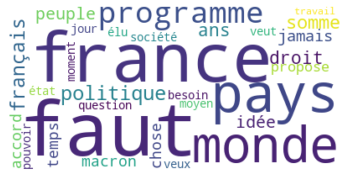

In [ ]:
def create_wordcloud(text,nb_words):
  wordcloud = WordCloud(max_words=nb_words,background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()


print("Wordcloud des mots lemmatisé de l'ensemble de tweets du candidat 1")
lemat_candidat1 = " ".join(df_tweet.loc[df_tweet.user_id=="JeanLuc_Melenchon","text_preprocess"])
print("Wordcloud des mots lemmatisé de l'ensemble des tweets de Jean-Luce Mélenchon")
create_wordcloud(lemat_candidat1, 30)

## **4. Scattertext**

Grâce à Scattertext, on va pouvoir comparer de manière visuelle la distinction de vocabulaire utilisé par deux candidats de votre choix. 


On doit d'abord construire un corpus avec nos données : 
- donner la variable de catégorie 
- donner la variable du texte

On peut rajouter le partie ```.compact(st.AssociationCompactor(4000))``` pour ne prendre en compte que les 4000 mots les plus importants dans le scattertext.

**TODO** : créer le corpus avec la fonction donnée ci-dessous

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
<ul>
    <li> Filtrer en gardant les tweets des deux candidats de votre choix </li>
</ul>
</p>

In [ ]:
df_sample = df_tweet.loc[df_tweet.user_id.isin(["Eric_Zemmour","JeanLuc_Melenchon"])]

corpus = st.CorpusFromPandas(data_frame = df_sample,
                             category_col = "user_id",
                             text_col = "text_preprocess",
                             nlp = nlp).build().compact(st.AssociationCompactor(4000))

In [ ]:
# On crée le html du scattertext
html = st.produce_scattertext_explorer(  corpus
                                       , category                  = "Eric_Zemmour"
                                       , category_name             = "Eric Zemmour"
                                       , not_category_name         = "Jean luc mélenchon"
                                       , minimum_term_frequency    = 10
                                       , pmi_threshold_coefficient = 1
                                       , term_ranker               = st.AbsoluteFrequencyRanker
                                       , term_scorer               = st.RankDifference()
                                       , transform                 = st.Scalers.dense_rank
                                       , width_in_pixels           = 1000
                                       )

# On enregistre le html
open("tweets_visualisation.html", 'wb').write(html.encode('utf-8'))


1226390

## **5. Modélisation**

On souhaite prédire si un tweet provient du compte de Marine Le Pen, de Jean Luc Mélenchon, d'Eric Zemmour ou d'Emmanuel Macron. Pour cela, on a besoin de : 
- Créer un échantillon train / dev
- préparer le text (préprocessing)
- créer des features (plusieurs méthodes : bag of words, counts of words, etc.)
- réaliser l'algorithme
- évaluer la performance du modèle 

### Création des échantillons 

**TODO** : créer un échantillon train (70% du jeu de données total) et un échantillon test 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>
<ul>
  <li> Utilisez la fonction <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" >train_test_split</a></li>
  <li> Vous pouvez prendre tout le df_tweet dans le X</li>
  <li> N'oubliez pas de rajouter un random_seed pour avoir des résultats reproductibles</li>
</p> 

In [ ]:
df_train, df_test, y_train, y_test = train_test_split(df_tweet,
                                                      df_tweet["user_id"],
                                                      test_size=0.3,
                                                      random_state=4362)
    
  #random_state : train test split il le fait de maniere aleatoire  pour que notre alleatoire reste fixe ne change pas
    
                                          

In [ ]:
print(f"Nombre de tweets dans l'échantillon train : {len(df_train)}")
print(f"Nombre de tweets dans l'échantillon test : {len(df_test)}")

Nombre de tweets dans l'échantillon train : 4111
Nombre de tweets dans l'échantillon test : 1762


**Réponse** : 

Nombre de tweets dans l'échantillon train : 4449 \
Nombre de tweets dans l'échantillon test : 1907

### Modèle de régression multinomiale sans gridsearch 

- Transformer le texte de df_train et df_test en vecteurs pour le modèle
- Utiliser la régression logistique multinomiale sans paramètre
- Regarder les paramètres sélectionnés
- Regarder le score sur l'échantillon test

**#TODO** : transformer df_train pour que ce ne soit plus des tweets, mais des vecteurs grâce à <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html" >TfidfVectorizer</a> 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Aide</b></font>
</summary>
<p>

La fonction TfidfVectorizer a des paramètres que vous pouvez choisir : 
<ul>

- Combien de n-grams : vous considérez mot par mot ou bien également des groupes de 2 mots
- max_df : si vous voulez enlever un pourcentage de mots les plus fréquents
- min_df : si vous voulez enlever un pourcentage de mots les moins fréquents
</p> 

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df_train["text_preprocess"])

**#TODO** : créer le modèle de régression logistique (OVR) et entrainer le modèle sur les données d'apprentissage

In [ ]:
# initialiser le modèle 
model = LogisticRegression(multi_class='ovr', random_state=4272)

# entrainer le modèle avec les données d'apprentissage
model_default_fit = model.fit(X_tfidf,y_train)
# vous pouvez voir les paramètres du modèle 
model_default_fit.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 4272,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X_test = vectorizer.transform(df_test["text_preprocess"])
model_default_fit.score(X_test, y_test)


0.7814982973893303

In [ ]:
model_default_fit.score(X_tfidf, y_train)


0.8725370955971783

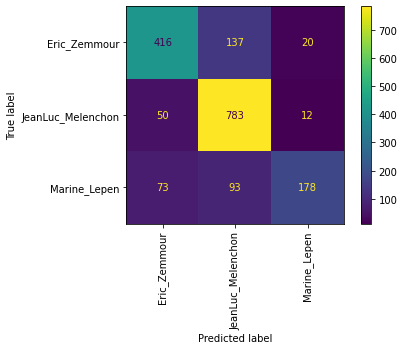

In [ ]:
from sklearn.metrics import confusion_matrix

pred_test = model_default_fit.predict(X_test)
cm = confusion_matrix(y_test, pred_test,labels=model_default_fit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_default_fit.classes_)
disp.plot(xticks_rotation='vertical')
plt.show()